# From sklearn.datasets load digits dataset and do following <br>

## Classify digits (0 to 9) using KNN classifier. <br> 
### You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score.<br>
### You can manually try different values of K or use gridsearchcv. <br>
### Plot confusion matrix <br>
### Plot classification report

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [6]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
target = digits.target

<Figure size 640x480 with 0 Axes>

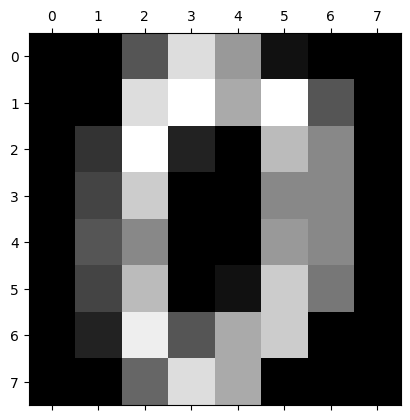

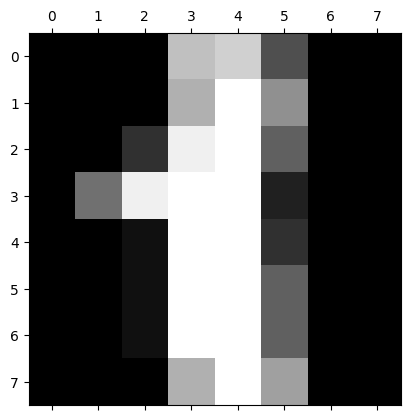

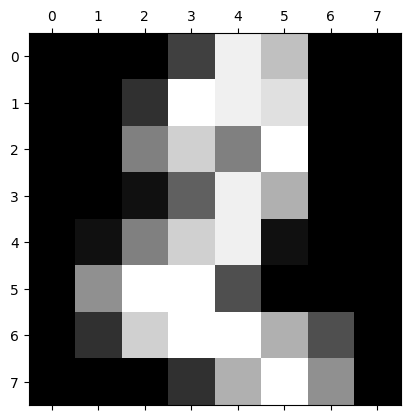

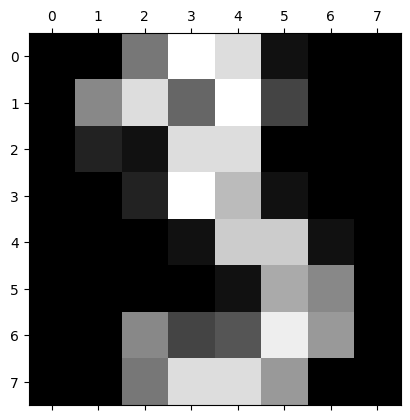

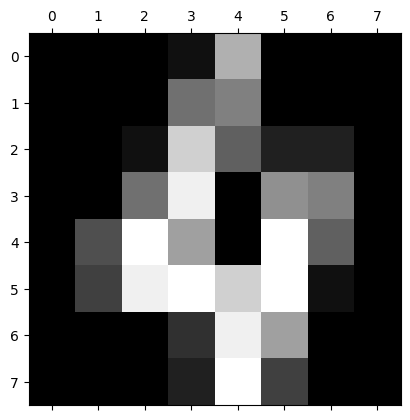

In [8]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(df,target,test_size=0.2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [18]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(knn,{
    "n_neighbors" : list(range(1, 21))}, cv=5, return_train_score = False
)

clf.fit(df,target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [21]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002266,5.335349e-04,0.065712,0.085396,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.002106,2.096208e-04,0.023933,0.001323,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.002400,4.898819e-04,0.024600,0.001625,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
3,0.001799,3.992333e-04,0.025001,0.001674,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
4,0.002200,3.999949e-04,0.023600,0.001356,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,5
5,0.002399,4.893958e-04,0.025200,0.000749,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,7
6,0.002000,6.324106e-04,0.026000,0.000631,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,6
7,0.002212,3.956220e-04,0.030305,0.003093,8,{'n_neighbors': 8},0.936111,0.958333,0.969359,0.977716,0.949861,0.958276,0.014580,8
8,0.002436,4.599655e-04,0.027522,0.001014,9,{'n_neighbors': 9},0.930556,0.952778,0.972145,0.977716,0.949861,0.956611,0.016887,9
9,0.002626,4.766670e-04,0.027624,0.000971,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,14


In [22]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [23]:
clf.best_params_

{'n_neighbors': 2}

In [24]:
clf.best_score_

0.9671711544413494

In [25]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [26]:
model.score(xtest,ytest)

0.9888888888888889

In [33]:
for i in range(10):
    prediction = model.predict([df.iloc[i]])  # Use .iloc to access rows by index
    print(prediction)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]


C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with featur

In [34]:
ypred=model.predict(xtest)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)

Text(50.722222222222214, 0.5, 'True')

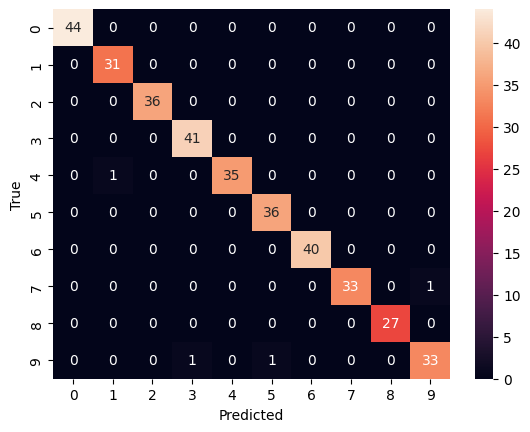

In [49]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        40
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        27
           9       0.97      0.94      0.96        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

